# **Import Library**

In [1]:
!pip install -U transformers sastrawi wordcloud lime
# transformers untuk menggunakan model NLP modern (misalnya BERT, GPT, dsb)
# sastrawi untuk stemming bahasa Indonesia (ubah kata ke bentuk dasar)
# wordcloud untuk membuat visualisasi word cloud dari teks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 17.7 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=348f0cd963a1286b799789f70fd99f4f5960beb9d5dfa33bce3df7c80f5955fa
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
  Attempting uninstall: transformers
    Found existing installation: transformers 4.56.2
    Uninstalling transformers-4.56.2:
      Successfully uninstalled transformers-4.56.2


In [2]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


In [3]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# DATASET TWITTER

In [4]:
#GABUNGKAN DATA TWITTER

# Import library
import pandas as pd

# Daftar nama file CSV
files = ['bunuh_diri(Juni).csv', 'bunuh_diri(Juli).csv', 'bunuh_diri(agt).csv', 'depresi(agt).csv']

# Buat list untuk menampung DataFrame
dfs = []

# Baca setiap file dan tambahkan ke list
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

# Gabungkan semua DataFrame menjadi satu
df_gabungan = pd.concat(dfs, ignore_index=True)

# Simpan hasil gabungan ke file CSV baru
df_gabungan.to_csv('gabungan.csv', index=False)

print("File CSV berhasil digabung dan disimpan sebagai 'gabungan.csv'")


File CSV berhasil digabung dan disimpan sebagai 'gabungan.csv'


# Loading Dataset

In [5]:
import pandas as pd

# Membaca data dari file CSV yang sudah disimpan sebelumnya
df_utama = pd.read_csv('gabungan.csv')

# Melihat ukuran data (jumlah baris dan kolom)
print(df_utama.shape)

# Menampilkan 5 baris pertama
print(df_utama.head())

(1239, 15)
   conversation_id_str                      created_at  favorite_count  \
0  1939704042630045752  Mon Jun 30 16:14:57 +0000 2025               0   
1  1939676260642509239  Mon Jun 30 15:29:31 +0000 2025               0   
2  1936725093260124608  Mon Jun 30 15:26:16 +0000 2025               0   
3  1939706498453790721  Mon Jun 30 15:24:01 +0000 2025               1   
4  1939705925985788232  Mon Jun 30 15:21:45 +0000 2025               0   

                                           full_text               id_str  \
0  @stelunara aduh by kayaknya yang itu gak dulu ...  1939719314644644074   
1          @antn_ja Pada bunuh diri semua endingnya   1939707881601081678   
2     @deviilworkk Bunuh diri aje anying sapa peduli  1939707063044849933   
3                     gws van ajg gue kek bunuh diri  1939706498453790721   
4  Ini percobaan bunuh diri gue ini ya Allah blac...  1939705925985788232   

                                         image_url in_reply_to_screen_name  \
0  

In [6]:
# Mengambil hanya dua kolom: full_text
df_utama = df_utama[['full_text']]

# Mengganti nama kolom
df_utama = df_utama.rename(columns={
    'full_text': 'Review'
})

# Melihat hasil perubahan
print(df_utama.head())

                                              Review
0  @stelunara aduh by kayaknya yang itu gak dulu ...
1          @antn_ja Pada bunuh diri semua endingnya 
2     @deviilworkk Bunuh diri aje anying sapa peduli
3                     gws van ajg gue kek bunuh diri
4  Ini percobaan bunuh diri gue ini ya Allah blac...


In [7]:
# Hapus missing value pada kolom Review
df_utama = df_utama.dropna(subset=['Review'])

# Hapus duplikat berdasarkan isi review saja
df_utama = df_utama.drop_duplicates(subset='Review')

# Cek jumlah data setelah bersih
print(f"Jumlah data setelah bersih: {df_utama.shape[0]}")

Jumlah data setelah bersih: 1238


##Preprocessing

Berikut adalah fungsi-fungsi yang digunakan untuk membersihkan dan memproses teks sebelum analisis sentimen:

1. cleaningText(text)
Membersihkan teks dengan menghapus mention (@username), hashtag, teks RT (retweet), tautan (link), angka, tanda baca, dan karakter non-alfabet lainnya. Juga mengganti karakter newline dengan spasi dan menghapus spasi berlebih di awal/akhir teks.

2. casefoldingText(text)
Mengonversi semua huruf menjadi huruf kecil (lowercase) agar bentuk kata lebih seragam dan tidak sensitif terhadap perbedaan kapitalisasi.

3. normalisasi(text)
Menormalkan kata tidak baku menjadi kata baku sesuai kaidah bahasa Indonesia, menggunakan kamus kata baku (kamuskatabaku.xlsx) yang berisi pasangan tidak_baku → kata_baku.

4. tokenizingText(text)
Memecah teks menjadi daftar kata (token) sehingga dapat diproses per kata.

5. filteringText(text)
Menghapus kata-kata berhenti (stopwords) yang tidak memiliki makna penting untuk analisis, misalnya kata sambung atau kata umum yang sering muncul. Daftar stopwords diperluas dengan kata tambahan sesuai kebutuhan proyek.

6. toSentence(list_words)
Menggabungkan kembali daftar kata menjadi sebuah kalimat utuh setelah filtering.

7. stemmingText(text)
Mengubah kata menjadi bentuk dasarnya (stem) menggunakan pustaka Sastrawi, sehingga variasi kata yang memiliki makna sama akan dianggap sebagai satu kata.

In [8]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# ====== BACA FILE KAMUS SLANGWORDS DARI EXCEL ======
df_kamus = pd.read_excel('kamuskatabaku.xlsx')  # pastikan file ada di folder kerja
slangwords = dict(zip(df_kamus['tidak_baku'].str.lower(), df_kamus['kata_baku'].str.lower()))

# ====== 1. Membersihkan teks ======
def cleaningText(text):
    if text is None or not isinstance(text, str):
        return ""
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

# ====== 2. Case folding ======
def casefoldingText(text):
    return text.lower() if isinstance(text, str) else ""

# ====== 3. Tokenisasi ======
def tokenizingText(text):
    return text.split() if isinstance(text, str) else []

# ====== 4. Filtering stopwords ======
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords.update(stopwords.words('english'))
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku','di','ga','ya','gaa','loh','kah','woi','woii','woy'])
    return [txt for txt in text if txt not in listStopwords]

# ====== 5. Gabung list ke kalimat ======
def toSentence(list_words):
    return ' '.join(list_words)

# ====== 6. Stemming ======
def stemmingText(text):
    if not isinstance(text, str):
        return ""
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# ====== 7. Normalisasi slangwords dari file Excel ======
def fix_slangwords(text):
    if not isinstance(text, str):
        return ""
    words = text.split()
    fixed_words = [slangwords[word.lower()] if word.lower() in slangwords else word for word in words]
    return ' '.join(fixed_words)

Kamus kata baku adalah daftar kata tidak baku beserta padanannya dalam bahasa Indonesia yang sesuai kaidah atau ejaan yang benar. Fungsinya antara lain:

1. Menormalkan Teks
Kamus kata baku membantu mengganti kata-kata tidak baku menjadi bentuk yang benar sesuai kaidah bahasa Indonesia.

2. Meningkatkan Kualitas Data Teks
Dalam analisis teks atau pemrosesan bahasa alami (NLP), kata baku membuat data lebih konsisten sehingga proses seperti tokenisasi, stemming, dan pencarian kata menjadi lebih akurat.

3. Mendukung Penulisan Formal
Dengan kamus ini, teks yang sebelumnya mengandung kata tidak baku dapat diubah menjadi bentuk formal yang sesuai untuk dokumen resmi, publikasi, atau laporan.

4. Memudahkan Pemahaman
Kata tidak baku sering kali berasal dari singkatan, logat, atau variasi ejaan. Kamus kata baku memastikan semua pembaca memahami maknanya tanpa kebingungan.

5. Memperkuat Standarisasi Bahasa
Penggunaan kamus kata baku membantu menjaga standar bahasa Indonesia di berbagai konteks, baik akademis, profesional, maupun media publik.

In [9]:
# Cleaning - membersihkan teks dari mention, hashtag, angka, tanda baca, link, dll.
df_utama['text_clean'] = df_utama['Review'].apply(cleaningText)

# Case Folding - mengubah seluruh huruf menjadi huruf kecil (lowercase)
df_utama['text_casefoldingText'] = df_utama['text_clean'].apply(casefoldingText)

# Normalisasi Kata Baku - mengganti kata tidak baku menjadi kata baku sesuai kamus (kamuskatabaku.xlsx)
df_utama['text_slangwords'] = df_utama['text_casefoldingText'].apply(fix_slangwords)

# Tokenizing - memecah teks menjadi daftar kata (token)
df_utama['text_tokenizingText'] = df_utama['text_slangwords'].apply(tokenizingText)

# Filtering Stopwords - menghapus kata-kata umum (stopwords) yang tidak penting untuk analisis
df_utama['text_stopword'] = df_utama['text_tokenizingText'].apply(filteringText)

# Kembalikan ke Kalimat - menggabungkan kembali token menjadi kalimat utuh
df_utama['text_akhir'] = df_utama['text_stopword'].apply(toSentence)

# Stemming - mengubah kata menjadi bentuk dasar menggunakan pustaka Sastrawi
df_utama['text_stemming'] = df_utama['text_akhir'].apply(stemmingText)

In [10]:
# Simpan ke file CSV
df_utama.to_csv('hasil_preprocessing.csv', index=False)

In [11]:
# Membaca data dari file CSV yang sudah disimpan sebelumnya
df_utama = pd.read_csv('hasil_preprocessing.csv')

# Melihat ukuran data (jumlah baris dan kolom)
print(df_utama.shape)

# Menampilkan 5 baris pertama
print(df_utama.head())

(1238, 8)
                                              Review  \
0  @stelunara aduh by kayaknya yang itu gak dulu ...   
1          @antn_ja Pada bunuh diri semua endingnya    
2     @deviilworkk Bunuh diri aje anying sapa peduli   
3                     gws van ajg gue kek bunuh diri   
4  Ini percobaan bunuh diri gue ini ya Allah blac...   

                                          text_clean  \
0  aduh by kayaknya yang itu gak dulu itu lagu te...   
1                 ja Pada bunuh diri semua endingnya   
2                  Bunuh diri aje anying sapa peduli   
3                     gws van ajg gue kek bunuh diri   
4  Ini percobaan bunuh diri gue ini ya Allah blac...   

                                text_casefoldingText  \
0  aduh by kayaknya yang itu gak dulu itu lagu te...   
1                 ja pada bunuh diri semua endingnya   
2                  bunuh diri aje anying sapa peduli   
3                     gws van ajg gue kek bunuh diri   
4  ini percobaan bunuh diri gue ini 

In [12]:
# Tampilkan semua kolom hasil preprocessing dan rating
df_utama[['Review', 'text_clean', 'text_casefoldingText', 'text_slangwords',
          'text_tokenizingText', 'text_stopword', 'text_stemming', 'text_akhir']].head(10)

,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_stemming,text_akhir
0,@stelunara aduh by kayaknya yang itu gak dulu ...,aduh by kayaknya yang itu gak dulu itu lagu te...,aduh by kayaknya yang itu gak dulu itu lagu te...,aduh by kayaknya yang itu tidak dulu itu lagu ...,"['aduh', 'by', 'kayaknya', 'yang', 'itu', 'tid...","['aduh', 'kayaknya', 'lagu', 'tersakit', 'bunuh']",aduh kayak lagu sakit bunuh,aduh kayaknya lagu tersakit bunuh
1,@antn_ja Pada bunuh diri semua endingnya,ja Pada bunuh diri semua endingnya,ja pada bunuh diri semua endingnya,saja pada bunuh diri semua endingnya,"['saja', 'pada', 'bunuh', 'diri', 'semua', 'en...","['bunuh', 'endingnya']",bunuh endingnya,bunuh endingnya
2,@deviilworkk Bunuh diri aje anying sapa peduli,Bunuh diri aje anying sapa peduli,bunuh diri aje anying sapa peduli,bunuh diri saja anying sapa peduli,"['bunuh', 'diri', 'saja', 'anying', 'sapa', 'p...","['bunuh', 'anying', 'sapa', 'peduli']",bunuh anying sapa peduli,bunuh anying sapa peduli
3,gws van ajg gue kek bunuh diri,gws van ajg gue kek bunuh diri,gws van ajg gue kek bunuh diri,gws van ajg gue kayak bunuh diri,"['gws', 'van', 'ajg', 'gue', 'kayak', 'bunuh',...","['gws', 'van', 'ajg', 'gue', 'kayak', 'bunuh']",gws van ajg gue kayak bunuh,gws van ajg gue kayak bunuh
4,Ini percobaan bunuh diri gue ini ya Allah blac...,Ini percobaan bunuh diri gue ini ya Allah blac...,ini percobaan bunuh diri gue ini ya allah blac...,ini percobaan bunuh diri gue ini ya allah blac...,"['ini', 'percobaan', 'bunuh', 'diri', 'gue', '...","['percobaan', 'bunuh', 'gue', 'allah', 'black'...",coba bunuh gue allah black hair dua mullet,percobaan bunuh gue allah black hair duanya mu...
5,Kenapa junhee bunuh diri ya. Ga abis pikir.,Kenapa junhee bunuh diri ya Ga abis pikir,kenapa junhee bunuh diri ya ga abis pikir,kenapa junhee bunuh diri ya tidak habis pikir,"['kenapa', 'junhee', 'bunuh', 'diri', 'ya', 't...","['junhee', 'bunuh', 'habis', 'pikir']",junhee bunuh habis pikir,junhee bunuh habis pikir
6,Yallah ini kemana lagi ga tahan yallah mau bun...,Yallah ini kemana lagi ga tahan yallah mau bun...,yallah ini kemana lagi ga tahan yallah mau bun...,yallah ini kemana lagi tidak tahan yallah mau ...,"['yallah', 'ini', 'kemana', 'lagi', 'tidak', '...","['yallah', 'kemana', 'tahan', 'yallah', 'bunuh...",yallah mana tahan yallah bunuh tahan banget ba...,yallah kemana tahan yallah bunuh tahan banget ...
7,Aku shock banget ternyata dewi ayu cucunya ma ...,Aku shock banget ternyata dewi ayu cucunya ma ...,aku shock banget ternyata dewi ayu cucunya ma ...,aku shock banget ternyata dewi ayu cucunya sam...,"['aku', 'shock', 'banget', 'ternyata', 'dewi',...","['shock', 'banget', 'dewi', 'ayu', 'cucunya', ...",shock banget dewi ayu cucu iyang dewi ayu nika...,shock banget dewi ayu cucunya iyang dewi ayu n...
8,@heybubble13 Kayanya disini aku pinjamannya ya...,Kayanya disini aku pinjamannya yang paling ban...,kayanya disini aku pinjamannya yang paling ban...,kayanya disini aku pinjamannya yang paling ban...,"['kayanya', 'disini', 'aku', 'pinjamannya', 'y...","['kayanya', 'pinjamannya', 'spnjam', 'juta', '...",kaya pinjam spnjam juta spylater juta gopaypin...,kayanya pinjamannya spnjam juta spylater juta ...
9,menurut gw bom.bunuh diri ini setelah khs munc...,menurut gw bombunuh diri ini setelah khs muncu...,menurut gw bombunuh diri ini setelah khs muncu...,menurut gue bombunuh diri ini setelah khs munc...,"['menurut', 'gue', 'bombunuh', 'diri', 'ini', ...","['gue', 'bombunuh', 'khs', 'muncul']",gue bombunuh khs muncul,gue bombunuh khs muncul


##Pelabelan Metode Lexicon

Setelah data melalui tahap preprocessing — mulai dari pembersihan teks, konversi huruf menjadi huruf kecil, penghilangan stopwords, hingga proses stemming — langkah berikutnya adalah memberikan label sentimen pada setiap data berdasarkan skor yang dihitung dari lexicon positif dan negatif.

Proses pelabelan ini bertujuan untuk mengelompokkan opini atau ulasan ke dalam dua kategori utama: positif dan negatif. Berbeda dengan metode berbasis rating pengguna, pendekatan ini menentukan sentimen langsung dari kata-kata yang digunakan dalam teks.

Aturan pelabelan yang digunakan:

1. Positif → jika skor lebih besar dari 0 (jumlah kata positif lebih banyak dibanding kata negatif) → Label angka: 1

2. Negatif → jika skor sama dengan 0 atau kurang dari 0 (jumlah kata negatif sama banyak atau lebih banyak dibanding kata positif) → Label angka: 0

Pendekatan ini banyak digunakan dalam penelitian opinion mining dan sentiment analysis karena lebih sederhana, tidak membutuhkan data rating, dan langsung fokus pada isi teks ulasan.

In [14]:
import pandas as pd

# 1. Baca lexicon positif & negatif (pemisah ;)
df_pos = pd.read_csv('positive.csv', sep=';', encoding='utf-8')
df_neg = pd.read_csv('negative.csv', sep=';', encoding='utf-8')

# 2. Pastikan nama kolom huruf kecil semua
df_pos.columns = df_pos.columns.str.lower()
df_neg.columns = df_neg.columns.str.lower()

# 3. Pastikan kolom 'weight' dibaca sebagai numeric (ganti koma jadi titik jika perlu)
df_pos['weight'] = df_pos['weight'].astype(str).str.replace(',', '.').astype(float)
df_neg['weight'] = df_neg['weight'].astype(str).str.replace(',', '.').astype(float)

# 4. Gabungkan jadi satu kamus lexicon
lexicon_df = pd.concat([df_pos, df_neg], ignore_index=True)
lexicon_dict = dict(zip(lexicon_df['word'].str.lower(), lexicon_df['weight']))

# 5. Fungsi menghitung skor teks
def hitung_skor(text):
    if not isinstance(text, str):
        return 0
    score = 0
    words = text.lower().split()
    for w in words:
        if w in lexicon_dict:
            score += lexicon_dict[w]
    return score

# 6. Fungsi label angka (1=positif, 0=negatif)
def label_angka(score):
    if score > 0:
        return 1   # positif
    else:
        return 0   # negatif

# 7. Fungsi label teks (positif / negatif saja)
def label_teks(score):
    if score > 0:
        return 'positif'
    else:
        return 'negatif'

# 8. Hitung skor & buat kolom label
df_utama['Skor'] = df_utama['text_stemming'].apply(hitung_skor)
df_utama['Sentimen'] = df_utama['Skor'].apply(label_teks)
df_utama['Label'] = df_utama['Skor'].apply(label_angka)

# 9. Simpan hasil
df_utama.to_csv('hasil_pelabelan_sentimen.csv', index=False, encoding='utf-8')

In [15]:
df_utama[['Review', 'text_stemming', 'Label', 'Sentimen']].head(10)

,Review,text_stemming,Label,Sentimen
0,@stelunara aduh by kayaknya yang itu gak dulu ...,aduh kayak lagu sakit bunuh,0,negatif
1,@antn_ja Pada bunuh diri semua endingnya,bunuh endingnya,0,negatif
2,@deviilworkk Bunuh diri aje anying sapa peduli,bunuh anying sapa peduli,0,negatif
3,gws van ajg gue kek bunuh diri,gws van ajg gue kayak bunuh,0,negatif
4,Ini percobaan bunuh diri gue ini ya Allah blac...,coba bunuh gue allah black hair dua mullet,0,negatif
5,Kenapa junhee bunuh diri ya. Ga abis pikir.,junhee bunuh habis pikir,0,negatif
6,Yallah ini kemana lagi ga tahan yallah mau bun...,yallah mana tahan yallah bunuh tahan banget ba...,0,negatif
7,Aku shock banget ternyata dewi ayu cucunya ma ...,shock banget dewi ayu cucu iyang dewi ayu nika...,0,negatif
8,@heybubble13 Kayanya disini aku pinjamannya ya...,kaya pinjam spnjam juta spylater juta gopaypin...,0,negatif
9,menurut gw bom.bunuh diri ini setelah khs munc...,gue bombunuh khs muncul,0,negatif


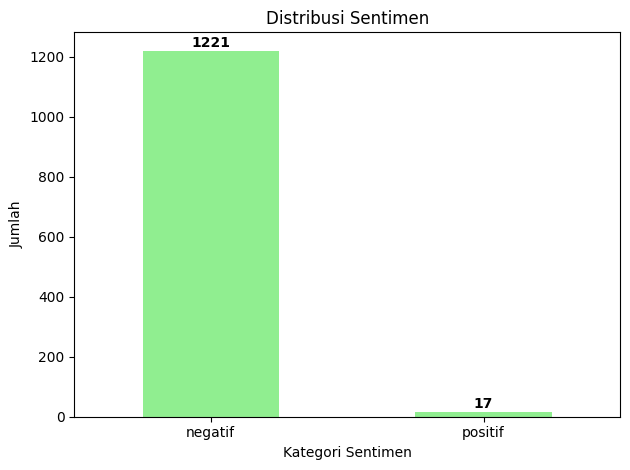

In [16]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing label
label_counts = df_utama['Sentimen'].value_counts()

# Plot bar chart
ax = label_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribusi Sentimen')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

# Tambahkan keterangan jumlah di atas setiap bar
for i, count in enumerate(label_counts):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Dari hasil analisis sentimen terhadap data ulasan, diperoleh distribusi sebagai berikut:

1. Positif: 17 data (sekitar 1,4%)

2. Negatif: 1.221 data (sekitar 98,6%)

# DATASET KAGGLE

In [18]:
# ============================================
# TRANSLATE CSV BAHASA INGGRIS KE INDONESIA (FIX)
# ============================================

# 1️⃣ Instal library googletrans versi terbaru yang kompatibel
!pip install googletrans==4.0.0-rc1 --no-deps tqdm

# 2️⃣ Import library
import pandas as pd
from googletrans import Translator
from tqdm import tqdm

# 3️⃣ Tulis nama file CSV kamu di sini
nama_file = 'suicide_dataset.csv'   # ⬅️ ganti dengan nama file kamu

# 4️⃣ Baca data CSV
df = pd.read_csv(nama_file)

print("Data awal:")
print(df.head())

# 5️⃣ Kolom teks yang mau diterjemahkan
kolom_teks = 'Tweet'   # ⬅️ ganti ke nama kolom teks kamu

# 6️⃣ Cek kolom
if kolom_teks not in df.columns:
    raise ValueError(f"Kolom '{kolom_teks}' tidak ditemukan! Kolom tersedia: {list(df.columns)}")

# 7️⃣ Proses translate
translator = Translator()
tqdm.pandas()  # progress bar

def translate_text(teks):
    try:
        hasil = translator.translate(teks, src='en', dest='id')
        return hasil.text
    except Exception as e:
        return teks  # kalau error, kembalikan teks asli

print("Sedang menerjemahkan... Mohon tunggu ya ⏳")
df['Tweet_Indonesia'] = df[kolom_teks].progress_apply(translate_text)

# 8️⃣ Simpan hasil ke file CSV baru
nama_output = 'data_terjemahan.csv'
df.to_csv(nama_output, index=False)

print(f"\n✅ Proses selesai! File disimpan sebagai '{nama_output}'")

Data awal:
                                               Tweet                  Suicide
0                                  making some lunch         Not Suicide post
1                        @Alexia You want his money.         Not Suicide post
2  @dizzyhrvy that crap took me forever to put to...  Potential Suicide post 
3  @jnaylor #kiwitweets Hey Jer! Since when did y...         Not Suicide post
4  Trying out &quot;Delicious Library 2&quot; wit...         Not Suicide post
Sedang menerjemahkan... Mohon tunggu ya ⏳


100%|██████████| 1787/1787 [36:48<00:00,  1.24s/it]


✅ Proses selesai! File disimpan sebagai 'data_terjemahan.csv'


In [23]:
import pandas as pd

# Membaca data dari file CSV yang sudah disimpan sebelumnya
df_utama = pd.read_csv('data_terjemahan.csv')

# Melihat ukuran data (jumlah baris dan kolom)
print(df_utama.shape)

# Menampilkan 5 baris pertama
print(df_utama.head())

(1787, 3)
                                               Tweet                  Suicide  \
0                                  making some lunch         Not Suicide post   
1                        @Alexia You want his money.         Not Suicide post   
2  @dizzyhrvy that crap took me forever to put to...  Potential Suicide post    
3  @jnaylor #kiwitweets Hey Jer! Since when did y...         Not Suicide post   
4  Trying out &quot;Delicious Library 2&quot; wit...         Not Suicide post   

                                     Tweet_Indonesia  
0                                Membuat makan siang  
1                 @Alexia Anda menginginkan uangnya.  
2  @dizzyhrvy omong kosong itu membutuhkan waktu ...  
3  @jnaylor #kiwitweets Hai Jer!Sejak kapan kamu ...  
4  Mencoba & quot; Perpustakaan Lezat 2 & quot;De...  


In [24]:
# Mengambil hanya dua kolom: Tweet_Indonesia
df_utama = df_utama[['Tweet_Indonesia', 'Suicide']]

# Mengganti nama kolom
df_utama = df_utama.rename(columns={
    'Tweet_Indonesia': 'Review'
})

# Melihat hasil perubahan
print(df_utama.head())

                                              Review                  Suicide
0                                Membuat makan siang         Not Suicide post
1                 @Alexia Anda menginginkan uangnya.         Not Suicide post
2  @dizzyhrvy omong kosong itu membutuhkan waktu ...  Potential Suicide post 
3  @jnaylor #kiwitweets Hai Jer!Sejak kapan kamu ...         Not Suicide post
4  Mencoba & quot; Perpustakaan Lezat 2 & quot;De...         Not Suicide post


In [25]:
# Hapus missing value pada kolom Review
df_utama = df_utama.dropna(subset=['Review'])

# Hapus duplikat berdasarkan isi review saja
df_utama = df_utama.drop_duplicates(subset='Review')

# Cek jumlah data setelah bersih
print(f"Jumlah data setelah bersih: {df_utama.shape[0]}")

Jumlah data setelah bersih: 1777


##Preprocessing

Berikut adalah fungsi-fungsi yang digunakan untuk membersihkan dan memproses teks sebelum analisis sentimen:

1. cleaningText(text)
Membersihkan teks dengan menghapus mention (@username), hashtag, teks RT (retweet), tautan (link), angka, tanda baca, dan karakter non-alfabet lainnya. Juga mengganti karakter newline dengan spasi dan menghapus spasi berlebih di awal/akhir teks.

2. casefoldingText(text)
Mengonversi semua huruf menjadi huruf kecil (lowercase) agar bentuk kata lebih seragam dan tidak sensitif terhadap perbedaan kapitalisasi.

3. normalisasi(text)
Menormalkan kata tidak baku menjadi kata baku sesuai kaidah bahasa Indonesia, menggunakan kamus kata baku (kamuskatabaku.xlsx) yang berisi pasangan tidak_baku → kata_baku.

4. tokenizingText(text)
Memecah teks menjadi daftar kata (token) sehingga dapat diproses per kata.

5. filteringText(text)
Menghapus kata-kata berhenti (stopwords) yang tidak memiliki makna penting untuk analisis, misalnya kata sambung atau kata umum yang sering muncul. Daftar stopwords diperluas dengan kata tambahan sesuai kebutuhan proyek.

6. toSentence(list_words)
Menggabungkan kembali daftar kata menjadi sebuah kalimat utuh setelah filtering.

7. stemmingText(text)
Mengubah kata menjadi bentuk dasarnya (stem) menggunakan pustaka Sastrawi, sehingga variasi kata yang memiliki makna sama akan dianggap sebagai satu kata.

In [26]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# ====== BACA FILE KAMUS SLANGWORDS DARI EXCEL ======
df_kamus = pd.read_excel('kamuskatabaku.xlsx')  # pastikan file ada di folder kerja
slangwords = dict(zip(df_kamus['tidak_baku'].str.lower(), df_kamus['kata_baku'].str.lower()))

# ====== 1. Membersihkan teks ======
def cleaningText(text):
    if text is None or not isinstance(text, str):
        return ""
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

# ====== 2. Case folding ======
def casefoldingText(text):
    return text.lower() if isinstance(text, str) else ""

# ====== 3. Tokenisasi ======
def tokenizingText(text):
    return text.split() if isinstance(text, str) else []

# ====== 4. Filtering stopwords ======
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords.update(stopwords.words('english'))
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku','di','ga','ya','gaa','loh','kah','woi','woii','woy'])
    return [txt for txt in text if txt not in listStopwords]

# ====== 5. Gabung list ke kalimat ======
def toSentence(list_words):
    return ' '.join(list_words)

# ====== 6. Stemming ======
def stemmingText(text):
    if not isinstance(text, str):
        return ""
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# ====== 7. Normalisasi slangwords dari file Excel ======
def fix_slangwords(text):
    if not isinstance(text, str):
        return ""
    words = text.split()
    fixed_words = [slangwords[word.lower()] if word.lower() in slangwords else word for word in words]
    return ' '.join(fixed_words)

Kamus kata baku adalah daftar kata tidak baku beserta padanannya dalam bahasa Indonesia yang sesuai kaidah atau ejaan yang benar. Fungsinya antara lain:

1. Menormalkan Teks
Kamus kata baku membantu mengganti kata-kata tidak baku menjadi bentuk yang benar sesuai kaidah bahasa Indonesia.

2. Meningkatkan Kualitas Data Teks
Dalam analisis teks atau pemrosesan bahasa alami (NLP), kata baku membuat data lebih konsisten sehingga proses seperti tokenisasi, stemming, dan pencarian kata menjadi lebih akurat.

3. Mendukung Penulisan Formal
Dengan kamus ini, teks yang sebelumnya mengandung kata tidak baku dapat diubah menjadi bentuk formal yang sesuai untuk dokumen resmi, publikasi, atau laporan.

4. Memudahkan Pemahaman
Kata tidak baku sering kali berasal dari singkatan, logat, atau variasi ejaan. Kamus kata baku memastikan semua pembaca memahami maknanya tanpa kebingungan.

5. Memperkuat Standarisasi Bahasa
Penggunaan kamus kata baku membantu menjaga standar bahasa Indonesia di berbagai konteks, baik akademis, profesional, maupun media publik.

In [27]:
# Cleaning - membersihkan teks dari mention, hashtag, angka, tanda baca, link, dll.
df_utama['text_clean'] = df_utama['Review'].apply(cleaningText)

# Case Folding - mengubah seluruh huruf menjadi huruf kecil (lowercase)
df_utama['text_casefoldingText'] = df_utama['text_clean'].apply(casefoldingText)

# Normalisasi Kata Baku - mengganti kata tidak baku menjadi kata baku sesuai kamus (kamuskatabaku.xlsx)
df_utama['text_slangwords'] = df_utama['text_casefoldingText'].apply(fix_slangwords)

# Tokenizing - memecah teks menjadi daftar kata (token)
df_utama['text_tokenizingText'] = df_utama['text_slangwords'].apply(tokenizingText)

# Filtering Stopwords - menghapus kata-kata umum (stopwords) yang tidak penting untuk analisis
df_utama['text_stopword'] = df_utama['text_tokenizingText'].apply(filteringText)

# Kembalikan ke Kalimat - menggabungkan kembali token menjadi kalimat utuh
df_utama['text_akhir'] = df_utama['text_stopword'].apply(toSentence)

# Stemming - mengubah kata menjadi bentuk dasar menggunakan pustaka Sastrawi
df_utama['text_stemming'] = df_utama['text_akhir'].apply(stemmingText)

In [28]:
# Simpan ke file CSV
df_utama.to_csv('hasil_preprocessing2.csv', index=False)

In [33]:
# Membaca data dari file CSV yang sudah disimpan sebelumnya
df_utama = pd.read_csv('hasil_preprocessing2.csv')

# Melihat ukuran data (jumlah baris dan kolom)
print(df_utama.shape)

# Menampilkan 5 baris pertama
print(df_utama.head())

(1777, 9)
                                              Review                  Suicide  \
0                                Membuat makan siang         Not Suicide post   
1                 @Alexia Anda menginginkan uangnya.         Not Suicide post   
2  @dizzyhrvy omong kosong itu membutuhkan waktu ...  Potential Suicide post    
3  @jnaylor #kiwitweets Hai Jer!Sejak kapan kamu ...         Not Suicide post   
4  Mencoba & quot; Perpustakaan Lezat 2 & quot;De...         Not Suicide post   

                                          text_clean  \
0                                Membuat makan siang   
1                          Anda menginginkan uangnya   
2  omong kosong itu membutuhkan waktu lama bagi s...   
3             Hai JerSejak kapan kamu mulai berkicau   
4  Mencoba  quot Perpustakaan Lezat   quotDengan ...   

                                text_casefoldingText  \
0                                membuat makan siang   
1                          anda menginginkan uangnya  

In [34]:
# Tampilkan semua kolom hasil preprocessing dan rating
df_utama[['Review', 'text_clean', 'text_casefoldingText', 'text_slangwords',
          'text_tokenizingText', 'text_stopword', 'text_stemming', 'text_akhir']].head(10)

,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_stemming,text_akhir
0,Membuat makan siang,Membuat makan siang,membuat makan siang,membuat makan siang,"['membuat', 'makan', 'siang']","['makan', 'siang']",makan siang,makan siang
1,@Alexia Anda menginginkan uangnya.,Anda menginginkan uangnya,anda menginginkan uangnya,anda menginginkan uangnya,"['anda', 'menginginkan', 'uangnya']",['uangnya'],uang,uangnya
2,@dizzyhrvy omong kosong itu membutuhkan waktu ...,omong kosong itu membutuhkan waktu lama bagi s...,omong kosong itu membutuhkan waktu lama bagi s...,omong kosong itu membutuhkan waktu lama bagi s...,"['omong', 'kosong', 'itu', 'membutuhkan', 'wak...","['omong', 'kosong', 'membutuhkan', 'menyatukan...",omong kosong butuh menyatukannyaaku tidur berh...,omong kosong membutuhkan menyatukannyaaku tidu...
3,@jnaylor #kiwitweets Hai Jer!Sejak kapan kamu ...,Hai JerSejak kapan kamu mulai berkicau,hai jersejak kapan kamu mulai berkicau,hai jersejak kapan kamu mulai berkicau,"['hai', 'jersejak', 'kapan', 'kamu', 'mulai', ...","['hai', 'jersejak', 'berkicau']",hai jersejak kicau,hai jersejak berkicau
4,Mencoba & quot; Perpustakaan Lezat 2 & quot;De...,Mencoba quot Perpustakaan Lezat quotDengan ...,mencoba quot perpustakaan lezat quotdengan ...,mencoba quot perpustakaan lezat quotdengan has...,"['mencoba', 'quot', 'perpustakaan', 'lezat', '...","['mencoba', 'quot', 'perpustakaan', 'lezat', '...",coba quot pustaka lezat quotdengan hasil agam ...,mencoba quot perpustakaan lezat quotdengan has...
5,"@ValenValdez Oh, senang mendengarnya.Tapi apak...",Oh senang mendengarnyaTapi apakah ini sudah be...,oh senang mendengarnyatapi apakah ini sudah be...,oh senang mendengarnyatapi apakah ini sudah be...,"['oh', 'senang', 'mendengarnyatapi', 'apakah',...","['oh', 'senang', 'mendengarnyatapi', 'berakhir...",oh senang mendengarnyatapi berakhiratau lanjut...,oh senang mendengarnyatapi berakhiratau melanj...
6,@ mcm180 kamu punya daftar sesama #hotties?And...,mcm kamu punya daftar sesama Anda harus membag...,mcm kamu punya daftar sesama anda harus membag...,macam kamu punya daftar sesama anda harus memb...,"['macam', 'kamu', 'punya', 'daftar', 'sesama',...","['daftar', 'membagikan', 'amigo']",daftar bagi amigo,daftar membagikan amigo
7,@jakepaul @jamescharles @LoganPaul Hanya karen...,Hanya karena Shane membuat serial tentangmu Bu...,hanya karena shane membuat serial tentangmu bu...,hanya karena shane membuat serial tentangmu bu...,"['hanya', 'karena', 'shane', 'membuat', 'seria...","['shane', 'serial', 'tentangmu', 'orangorang',...",shane serial tentang orangorang anggap serius y,shane serial tentangmu orangorang menganggapmu...
8,saatnya bersantai di taman bir Warsawa,saatnya bersantai di taman bir Warsawa,saatnya bersantai di taman bir warsawa,saatnya bersantai di taman bir warsawa,"['saatnya', 'bersantai', 'di', 'taman', 'bir',...","['bersantai', 'taman', 'bir', 'warsawa']",santa taman bir warsawa,bersantai taman bir warsawa
9,Aku benci hidupku lmao. Kuharap aku segera mat...,Aku benci hidupku lmao Kuharap aku segera mati...,aku benci hidupku lmao kuharap aku segera mati...,aku benci hidupku lmao kuharap aku segera mati...,"['aku', 'benci', 'hidupku', 'lmao', 'kuharap',...","['benci', 'hidupku', 'lmao', 'kuharap', 'mati'...",benci hidup lmao harap mati tibatiba lelah,benci hidupku lmao kuharap mati tibatiba lelah


In [35]:
import pandas as pd

# 1. Baca lexicon positif & negatif (pemisah ;)
df_pos = pd.read_csv('positive.csv', sep=';', encoding='utf-8')
df_neg = pd.read_csv('negative.csv', sep=';', encoding='utf-8')

# 2. Pastikan nama kolom huruf kecil semua
df_pos.columns = df_pos.columns.str.lower()
df_neg.columns = df_neg.columns.str.lower()

# 3. Pastikan kolom 'weight' dibaca sebagai numeric (ganti koma jadi titik jika perlu)
df_pos['weight'] = df_pos['weight'].astype(str).str.replace(',', '.').astype(float)
df_neg['weight'] = df_neg['weight'].astype(str).str.replace(',', '.').astype(float)

# 4. Gabungkan jadi satu kamus lexicon
lexicon_df = pd.concat([df_pos, df_neg], ignore_index=True)
lexicon_dict = dict(zip(lexicon_df['word'].str.lower(), lexicon_df['weight']))

# 5. Fungsi menghitung skor teks
def hitung_skor(text):
    if not isinstance(text, str):
        return 0
    score = 0
    words = text.lower().split()
    for w in words:
        if w in lexicon_dict:
            score += lexicon_dict[w]
    return score

# 6. Fungsi label angka (1=positif, 0=negatif)
def label_angka(score):
    if score > 0:
        return 1   # positif
    else:
        return 0   # negatif

# 7. Fungsi label teks (positif / negatif saja)
def label_teks(score):
    if score > 0:
        return 'positif'
    else:
        return 'negatif'

# 8. Hitung skor & buat kolom label
df_utama['Skor'] = df_utama['text_stemming'].apply(hitung_skor)
df_utama['Sentimen'] = df_utama['Skor'].apply(label_teks)
df_utama['Label'] = df_utama['Skor'].apply(label_angka)

# 9. Simpan hasil
df_utama.to_csv('hasil_pelabelan_sentimen2.csv', index=False, encoding='utf-8')

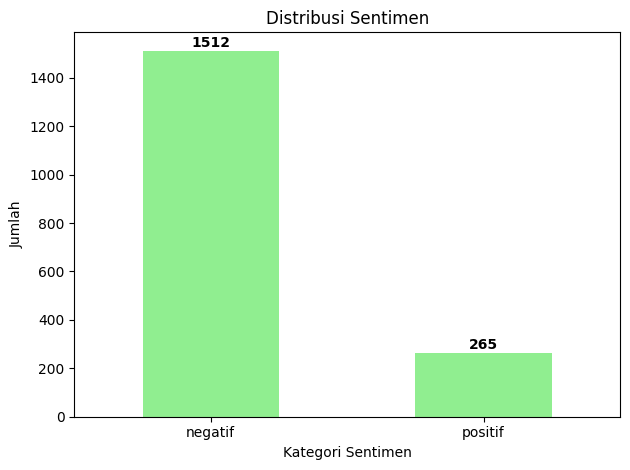

In [36]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing label
label_counts = df_utama['Sentimen'].value_counts()

# Plot bar chart
ax = label_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribusi Sentimen')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

# Tambahkan keterangan jumlah di atas setiap bar
for i, count in enumerate(label_counts):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()